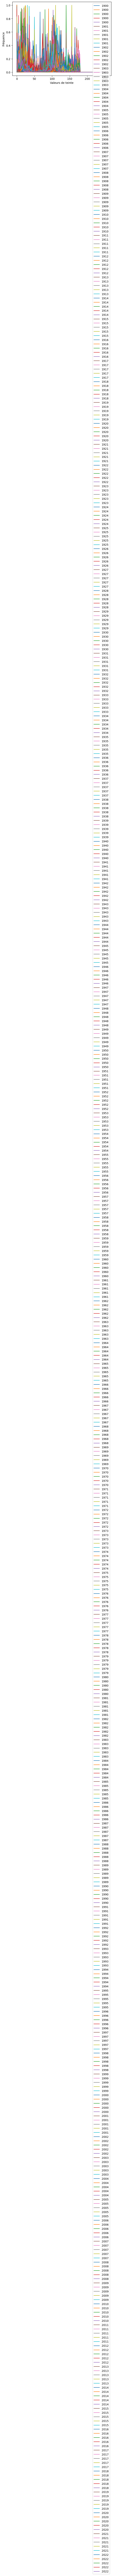

In [4]:
import cv2
import os
import matplotlib.pyplot as plt

def calculer_histogramme(image):
    # Convertir l'image en espace de couleur HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculer l'histogramme de couleur pour la composante de teinte
    histogramme = cv2.calcHist([hsv_image], [0], None, [256], [0, 256])
    histogramme = cv2.normalize(histogramme, histogramme).flatten()

    return histogramme

# Chemin du dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit"

# Lister tous les fichiers du dossier
fichiers_images = os.listdir(dossier_images)

# Initialiser les listes pour les années (abscisses) et les histogrammes (ordonnées)
annees = []
histogrammes = []

# Parcourir les fichiers images
for fichier_image in fichiers_images:
    # Vérifier si le fichier est une image (extension .jpg, .png, etc.)
    if fichier_image.lower().endswith(('.jpg', '.jpeg')):
        # Extraire l'année à partir du nom de fichier
        nom_fichier = os.path.splitext(fichier_image)[0]  # Supprimer l'extension du fichier
        annee = int(nom_fichier.split('-')[0])  # Extraire l'année en convertissant en entier

        # Charger l'image
        chemin_image = os.path.join(dossier_images, fichier_image)
        image = cv2.imread(chemin_image)

        # Calculer l'histogramme de couleur de l'image
        histogramme = calculer_histogramme(image)

        # Ajouter l'année et l'histogramme à leurs listes respectives
        annees.append(annee)
        histogrammes.append(histogramme)

# Tracer le graphe
for annee, histogramme in zip(annees, histogrammes):
    plt.plot(histogramme, label=str(annee))

plt.xlabel('Valeurs de teinte')
plt.ylabel('Fréquence')
plt.legend()
plt.show()


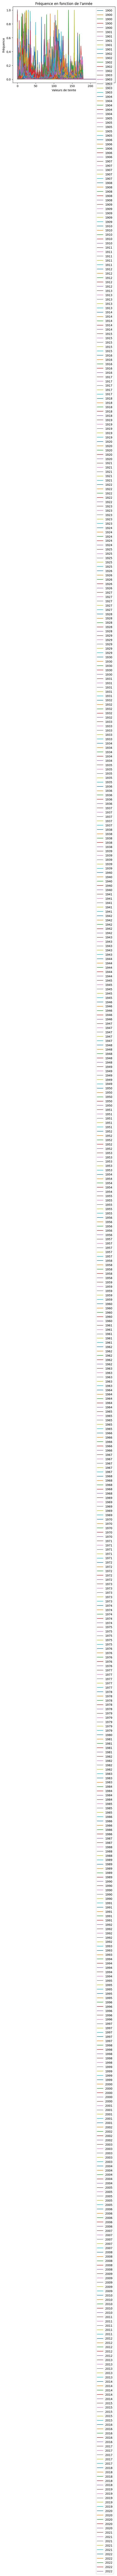

In [50]:
import cv2
import os
import matplotlib.pyplot as plt

def calculer_histogramme(image):
    # Convertir l'image en espace de couleur HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculer l'histogramme de couleur pour la composante de teinte
    histogramme = cv2.calcHist([hsv_image], [0], None, [256], [0, 256])
    histogramme = cv2.normalize(histogramme, histogramme).flatten()

    return histogramme

# Chemin du dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit_couleur"

# Lister tous les fichiers du dossier
fichiers_images = os.listdir(dossier_images)

# Initialiser les listes pour les années (abscisses) et les histogrammes de fréquence et de teinte (ordonnées)
annees = []
histogrammes_frequence = []
histogrammes_teinte = []

# Parcourir les fichiers images
for fichier_image in fichiers_images:
    # Vérifier si le fichier est une image (extension .jpg, .png, etc.)
    if fichier_image.lower().endswith(('.jpg', '.jpeg')):
        # Extraire l'année à partir du nom de fichier
        nom_fichier = os.path.splitext(fichier_image)[0]  # Supprimer l'extension du fichier
        annee = int(nom_fichier.split('-')[0])  # Extraire l'année en convertissant en entier

        # Charger l'image
        chemin_image = os.path.join(dossier_images, fichier_image)
        image = cv2.imread(chemin_image)

        # Calculer l'histogramme de couleur de l'image
        histogramme = calculer_histogramme(image)

        # Ajouter l'année et les histogrammes à leurs listes respectives
        annees.append(annee)
        histogrammes_frequence.append(histogramme)
        histogrammes_teinte.append(histogramme)

# Tracer le graphe de la fréquence en fonction de l'année
for annee, histogramme in zip(annees, histogrammes_frequence):
    plt.plot(histogramme, label=str(annee))

plt.xlabel('Valeurs de teinte')
plt.ylabel('Fréquence')
plt.legend()
plt.title('Fréquence en fonction de l\'année')
plt.show()



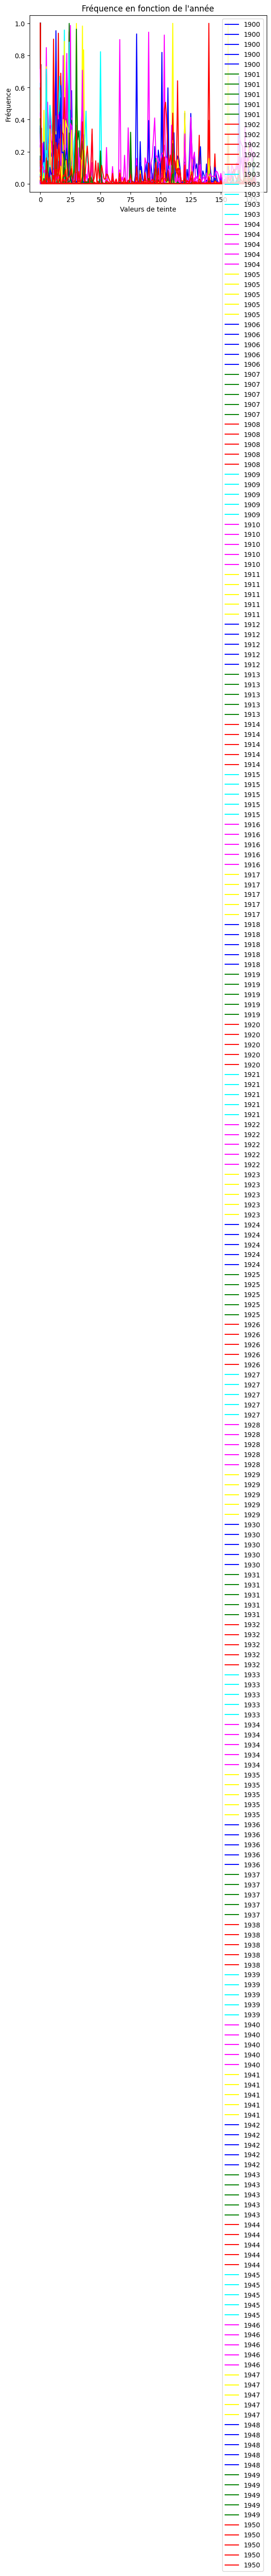

In [68]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

def calculer_histogramme(image):
    # Convertir l'image en espace de couleur HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculer l'histogramme de couleur pour la composante de teinte
    histogramme = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])
    histogramme = cv2.normalize(histogramme, histogramme).flatten()

    return histogramme

# Chemin du dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit"

# Lister tous les fichiers du dossier
fichiers_images = os.listdir(dossier_images)

# Années à sélectionner (1900 uniquement ou de 1900 à 1905 inclus)
annee_debut = 1900
annee_fin = 1950

# Initialiser les listes pour les années (abscisses) et les histogrammes de fréquence et de teinte (ordonnées)
annees = []
histogrammes_frequence = []
histogrammes_teinte = []

# Dictionnaire pour stocker les couleurs associées à chaque année
couleurs_annees = {}

# Liste de couleurs prédéfinies
couleurs = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

# Parcourir les fichiers images
for fichier_image in fichiers_images:
    # Vérifier si le fichier est une image (extension .jpg, .jpeg)
    if fichier_image.lower().endswith(('.jpg', '.jpeg')):
        # Extraire l'année à partir du nom de fichier
        nom_fichier = os.path.splitext(fichier_image)[0]  # Supprimer l'extension du fichier
        annee = int(nom_fichier.split('-')[0])  # Extraire l'année en convertissant en entier

        # Vérifier si l'année est dans la plage souhaitée
        if annee_debut <= annee <= annee_fin:
            # Charger l'image
            chemin_image = os.path.join(dossier_images, fichier_image)
            image = cv2.imread(chemin_image)

            # Calculer l'histogramme de couleur de l'image
            histogramme = calculer_histogramme(image)

            # Ajouter l'année et les histogrammes à leurs listes respectives
            annees.append(annee)
            histogrammes_frequence.append(histogramme)
            histogrammes_teinte.append(histogramme)

            # Associer une couleur spécifique à l'année
            if annee not in couleurs_annees:
                indice_couleur = (annee - annee_debut) % len(couleurs)
                couleurs_annees[annee] = couleurs[indice_couleur]

# Tracer le graphe de la fréquence en fonction de l'année
for annee, histogramme in zip(annees, histogrammes_frequence):
    couleur = couleurs_annees.get(annee, None)
    plt.plot(histogramme, label=str(annee), color=couleur)

plt.xlabel('Valeurs de teinte')
plt.ylabel('Fréquence')
plt.legend()
plt.title('Fréquence en fonction de l\'année')
plt.show()


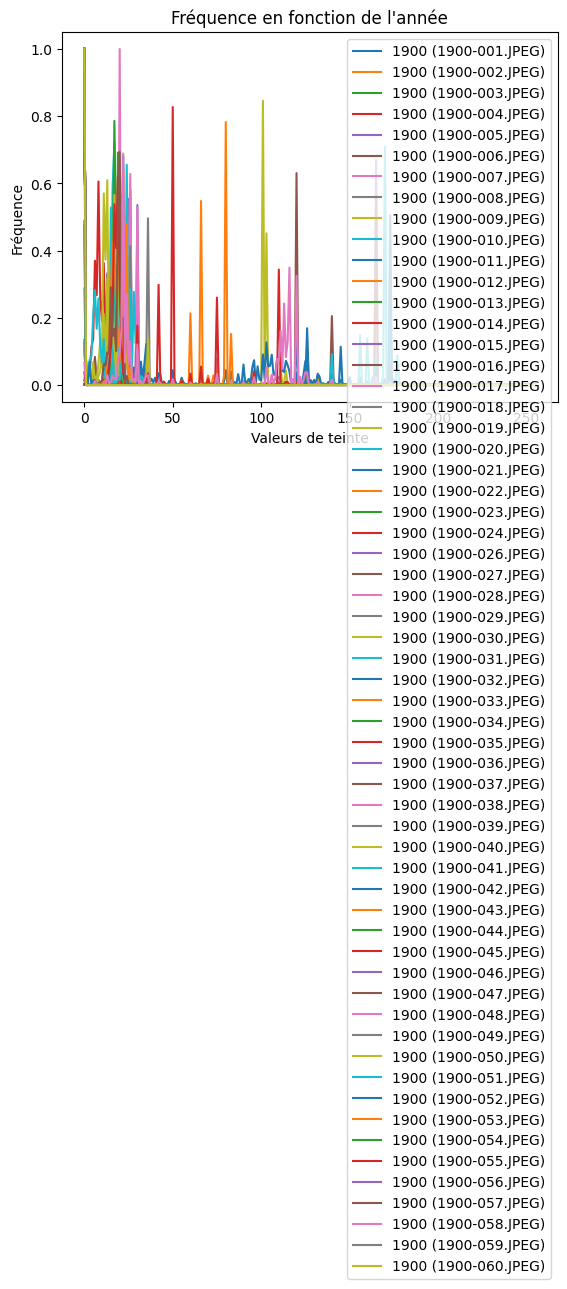

In [36]:
import cv2
import os
import matplotlib.pyplot as plt

def calculer_histogramme(image):
    # Convertir l'image en espace de couleur HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculer l'histogramme de couleur pour la composante de teinte
    histogramme = cv2.calcHist([hsv_image], [0], None, [256], [0, 256])
    histogramme = cv2.normalize(histogramme, histogramme).flatten()

    return histogramme

# Chemin du dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_1900"

# Années à sélectionner (1900 à 1902 inclus)
annee_debut = 1900
annee_fin = 1902

# Numéros d'identification à sélectionner (4 à 6 inclus)
numero_debut = 1
numero_fin = 60

# Lister tous les fichiers du dossier
fichiers_images = os.listdir(dossier_images)

# Initialiser les listes pour les années (abscisses) et les histogrammes de fréquence et de teinte (ordonnées)
annees = []
histogrammes_frequence = []
histogrammes_teinte = []
noms_fichiers = []

# Parcourir les fichiers images
for fichier_image in fichiers_images:
    # Vérifier si le fichier est une image (extension .jpg, .png, etc.)
    if fichier_image.lower().endswith(('.jpg', '.jpeg')):
        # Extraire l'année et le numéro d'identification à partir du nom de fichier
        nom_fichier = os.path.splitext(fichier_image)[0]  # Supprimer l'extension du fichier
        annee, numero = map(int, nom_fichier.split('-'))  # Extraire l'année et le numéro en convertissant en entiers

        # Vérifier si l'année et le numéro sont dans les intervalles souhaités
        if annee_debut <= annee <= annee_fin and numero_debut <= numero <= numero_fin:
            # Charger l'image
            chemin_image = os.path.join(dossier_images, fichier_image)
            image = cv2.imread(chemin_image)

            # Calculer l'histogramme de couleur de l'image
            histogramme = calculer_histogramme(image)

            # Ajouter l'année, les histogrammes et le nom du fichier à leurs listes respectives
            annees.append(annee)
            histogrammes_frequence.append(histogramme)
            histogrammes_teinte.append(histogramme.copy())  # Utiliser une copie de l'histogramme pour chaque image
            noms_fichiers.append(fichier_image)

# Tracer le graphe de la fréquence en fonction de l'année
for annee, histogramme, nom_fichier in zip(annees, histogrammes_frequence, noms_fichiers):
    plt.plot(histogramme, label=str(annee))

# Ajouter la légende avec les noms des fichiers
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [f'{label} ({nom_fichier})' for label, nom_fichier in zip(labels, noms_fichiers)]
plt.legend(handles, new_labels)

plt.xlabel('Valeurs de teinte')
plt.ylabel('Fréquence')
plt.title('Fréquence en fonction de l\'année')
plt.show()


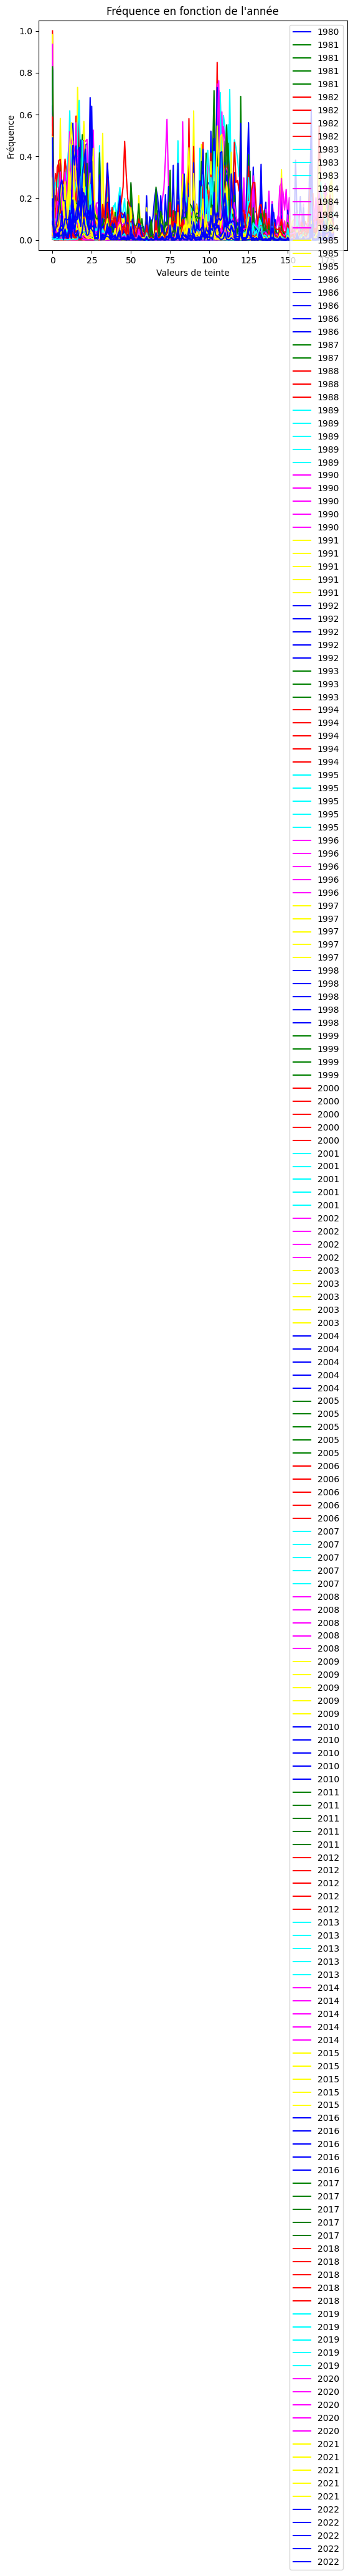

In [52]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

def calculer_histogramme(image):
    # Convertir l'image en espace de couleur HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculer l'histogramme de couleur pour la composante de teinte
    histogramme = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])
    histogramme = cv2.normalize(histogramme, histogramme).flatten()

    return histogramme

# Chemin du dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit_couleur"

# Lister tous les fichiers du dossier
fichiers_images = os.listdir(dossier_images)

# Années à sélectionner (1900 uniquement ou de 1900 à 1905 inclus)
annee_debut = 1980
annee_fin = 2022

# Numéros d'identification à sélectionner (4 à 6 inclus)
numero_debut = 1
numero_fin = 5

# Initialiser les listes pour les années (abscisses) et les histogrammes de fréquence et de teinte (ordonnées)
annees = []
histogrammes_frequence = []
histogrammes_teinte = []

# Dictionnaire pour stocker les couleurs associées à chaque année
couleurs_annees = {}

# Liste de couleurs prédéfinies
couleurs = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

# Parcourir les fichiers images
for fichier_image in fichiers_images:
    # Vérifier si le fichier est une image (extension .jpg, .jpeg)
    if fichier_image.lower().endswith(('.jpg', '.jpeg')):
        # Extraire l'année et le numéro d'identification à partir du nom de fichier
        nom_fichier = os.path.splitext(fichier_image)[0]  # Supprimer l'extension du fichier
        annee, numero = map(int, nom_fichier.split('-'))  # Extraire l'année et le numéro en convertissant en entiers

        # Vérifier si l'année et le numéro sont dans les intervalles souhaités
        if annee_debut <= annee <= annee_fin and numero_debut <= numero <= numero_fin:
            # Charger l'image
            chemin_image = os.path.join(dossier_images, fichier_image)
            image = cv2.imread(chemin_image)

            # Calculer l'histogramme de couleur de l'image
            histogramme = calculer_histogramme(image)

            # Ajouter l'année et les histogrammes à leurs listes respectives
            annees.append(annee)
            histogrammes_frequence.append(histogramme)
            histogrammes_teinte.append(histogramme)

            # Associer une couleur spécifique à l'année
            if annee not in couleurs_annees:
                indice_couleur = (annee - annee_debut) % len(couleurs)
                couleurs_annees[annee] = couleurs[indice_couleur]

# Tracer le graphe de la fréquence en fonction de l'année
for annee, histogramme in zip(annees, histogrammes_frequence):
    couleur = couleurs_annees.get(annee, None)
    plt.plot(histogramme, label=str(annee), color=couleur)

plt.xlabel('Valeurs de teinte')
plt.ylabel('Fréquence')
plt.legend()
plt.title('Fréquence en fonction de l\'année')
plt.show()


marqué couleur mais c'est NB
33, 58, 102, 148, 174, 223
marqué NB mais c'est couleur (moins grave)
61, 83, 253, 256, 258, 260, 261, 263, 264, 267, 268, 269,274, 276, 277, 278, 283, 284, 286, 287, 288,289, 291, 292, 

1940-002 oui c'est juste!!201 231 251, 291, 301

moyenne image couleur total du dossier= 2.5336700336700333


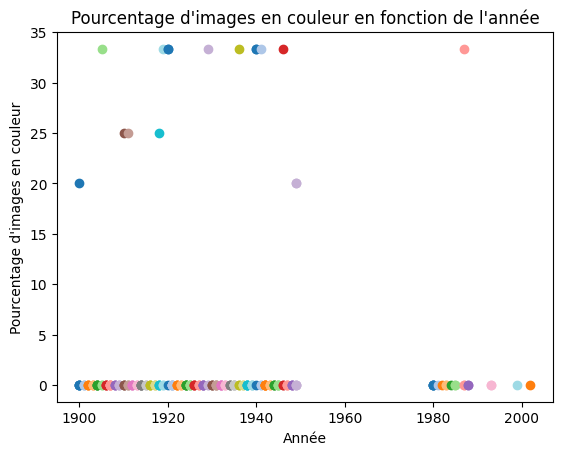

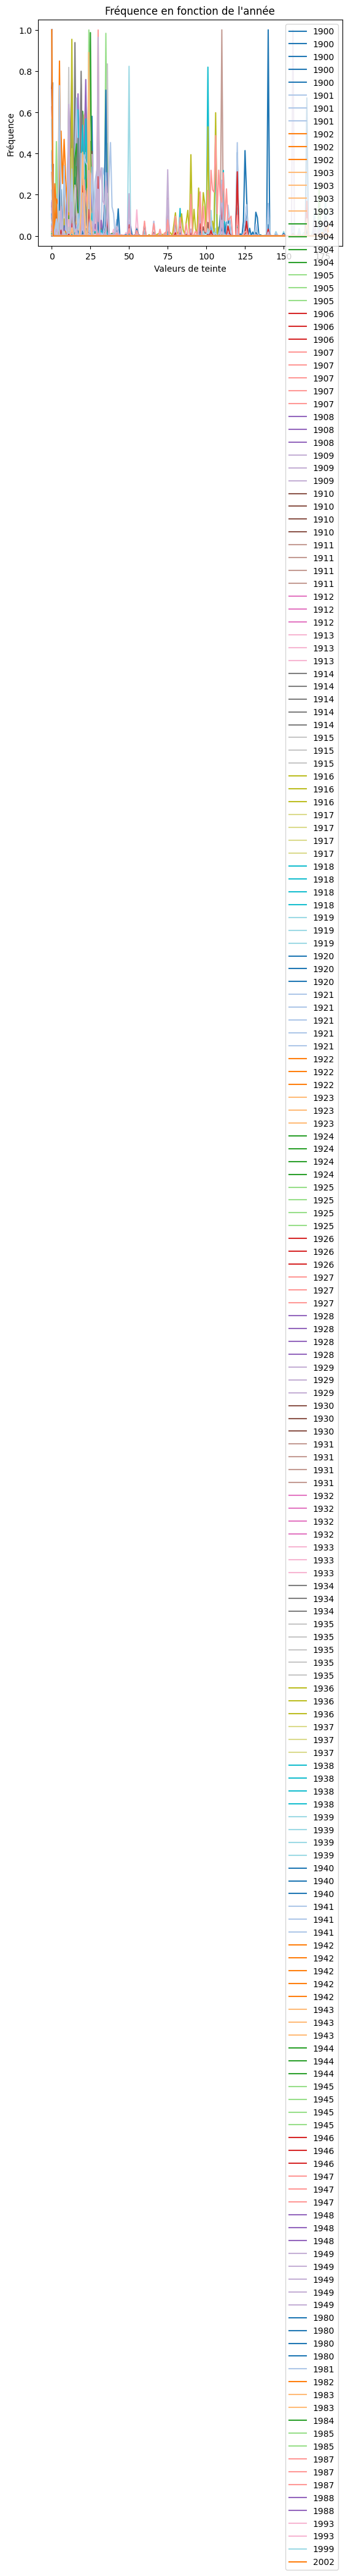

In [81]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

def calculer_histogramme(image):
    # Convertir l'image en espace de couleur HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculer l'histogramme de couleur pour la composante de teinte
    histogramme = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])
    histogramme = cv2.normalize(histogramme, histogramme).flatten()

    return histogramme

# Chemin du dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit_NB"

# Lister tous les fichiers du dossier
fichiers_images = os.listdir(dossier_images)

# Années à sélectionner (1900 uniquement ou de 1900 à 1905 inclus)
annee_debut = 1900
annee_fin = 2022

# Numéros d'identification à sélectionner (4 à 6 inclus)
numero_debut = 1
numero_fin = 5

# Initialiser les listes pour les années (abscisses) et les histogrammes de fréquence et de teinte (ordonnées)
annees = []
histogrammes_frequence = []
histogrammes_teinte = []

# Dictionnaire pour stocker les couleurs associées à chaque année
couleurs_annees = {}

# Palette de couleurs
couleurs = plt.get_cmap('tab20')

# Parcourir les fichiers images
for fichier_image in fichiers_images:
    # Vérifier si le fichier est une image (extension .jpg, .jpeg)
    if fichier_image.lower().endswith(('.jpg', '.jpeg')):
        # Extraire l'année et le numéro d'identification à partir du nom de fichier
        nom_fichier = os.path.splitext(fichier_image)[0]  # Supprimer l'extension du fichier
        annee, numero = map(int, nom_fichier.split('-'))  # Extraire l'année et le numéro en convertissant en entiers

        # Vérifier si l'année et le numéro sont dans les intervalles souhaités
        if annee_debut <= annee <= annee_fin and numero_debut <= numero <= numero_fin:
            # Charger l'image
            chemin_image = os.path.join(dossier_images, fichier_image)
            image = cv2.imread(chemin_image)

            # Calculer l'histogramme de couleur de l'image
            histogramme = calculer_histogramme(image)

            # Ajouter l'année et les histogrammes à leurs listes respectives
            annees.append(annee)
            histogrammes_frequence.append(histogramme)
            histogrammes_teinte.append(histogramme)

            # Associer une couleur spécifique à l'année
            if annee not in couleurs_annees:
                indice_couleur = (annee - annee_debut) % 20  # Utiliser modulo 20 pour rester dans la plage des couleurs disponibles
                couleurs_annees[annee] = couleurs(indice_couleur)

# Pourcentage d'images en couleur par rapport au nombre total d'images par année
pourcentages_couleur = []
for annee, histogramme in zip(annees, histogrammes_frequence):
    histogramme_cropped = histogramme[75:]  # Cropped histogram from index 75 to the end
    nombre_images_total = annees.count(annee)  # Nombre total d'images pour l'année donnée
    nombre_images_couleur = np.sum(np.max(histogramme_cropped) > 0.1)  # Nombre d'images en couleur pour l'année donnée
    pourcentage = (nombre_images_couleur / nombre_images_total) * 100
    pourcentages_couleur.append(pourcentage)
print('moyenne image couleur total du dossier=' , np.mean(pourcentages_couleur))
# Tracer le graphe du pourcentage d'images en couleur en fonction de l'année
for annee, pourcentage in zip(annees, pourcentages_couleur):
    couleur = couleurs_annees.get(annee, None)
    plt.plot(annee, pourcentage, marker='o', color=couleur, linewidth=2)

plt.xlabel('Année')
plt.ylabel('Pourcentage d\'images en couleur')
plt.title('Pourcentage d\'images en couleur en fonction de l\'année')
plt.show()
# Tracer le graphe de la fréquence en fonction de l'année
for annee, histogramme in zip(annees, histogrammes_frequence):
    couleur = couleurs_annees.get(annee, None)
    plt.plot(histogramme, label=str(annee), color=couleur)

plt.xlabel('Valeurs de teinte')
plt.ylabel('Fréquence')
plt.legend()
plt.title('Fréquence en fonction de l\'année')
plt.show()


1 pic : à partir de 1 pic dans la plage considérée, c'est considéré comme étant de la couleur

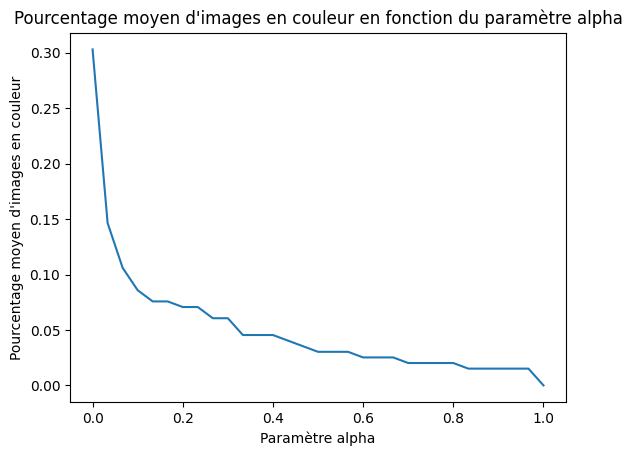

In [85]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

def calculer_histogramme(image):
    # Convertir l'image en espace de couleur HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculer l'histogramme de couleur pour la composante de teinte
    histogramme = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])
    histogramme = cv2.normalize(histogramme, histogramme).flatten()

    return histogramme

# Chemin du dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit_NB"

# Lister tous les fichiers du dossier
fichiers_images = os.listdir(dossier_images)

# Années à sélectionner (1900 uniquement ou de 1900 à 1905 inclus)
annee_debut = 1900
annee_fin = 2022

# Numéros d'identification à sélectionner (4 à 6 inclus)
numero_debut = 1
numero_fin = 5

# Paramètre alpha (de 0 à 1) pour seuiller l'histogramme de teinte
alphas = np.linspace(0, 1, 31)

# Liste pour stocker les pourcentages moyens d'images en couleur pour chaque valeur de alpha
pourcentages_moyens = []

# Parcourir les valeurs de alpha
for alpha in alphas:
    # Initialiser la liste des pourcentages d'images en couleur pour chaque année
    pourcentages_couleur = []

    # Parcourir les fichiers images
    for fichier_image in fichiers_images:
        # Vérifier si le fichier est une image (extension .jpg, .jpeg)
        if fichier_image.lower().endswith(('.jpg', '.jpeg')):
            # Extraire l'année et le numéro d'identification à partir du nom de fichier
            nom_fichier = os.path.splitext(fichier_image)[0]  # Supprimer l'extension du fichier
            annee, numero = map(int, nom_fichier.split('-'))  # Extraire l'année et le numéro en convertissant en entiers

            # Vérifier si l'année et le numéro sont dans les intervalles souhaités
            if annee_debut <= annee <= annee_fin and numero_debut <= numero <= numero_fin:
                # Charger l'image
                chemin_image = os.path.join(dossier_images, fichier_image)
                image = cv2.imread(chemin_image)

                # Calculer l'histogramme de couleur de l'image
                histogramme = calculer_histogramme(image)

                # Seuiller l'histogramme de teinte
                histogramme_seuil = histogramme[75:]  # Cropped histogram from index 75 to the end
                histogramme_seuil = (histogramme_seuil > alpha).astype(int)  # Seuillage avec la valeur de alpha

                # Vérifier si l'image est en couleur en comptant le nombre de valeurs seuillées non nulles
                est_couleur = np.sum(histogramme_seuil) > 0

                # Ajouter le résultat à la liste des pourcentages d'images en couleur pour l'année donnée
                pourcentages_couleur.append(est_couleur)

    # Calculer le pourcentage moyen d'images en couleur pour toutes les années
    pourcentage_moyen = np.mean(pourcentages_couleur)
    pourcentages_moyens.append(pourcentage_moyen)

# Tracer le graphe du pourcentage moyen d'images en couleur en fonction du paramètre alpha
plt.plot(alphas, pourcentages_moyens)
plt.xlabel('Paramètre alpha')
plt.ylabel('Pourcentage moyen d\'images en couleur')
plt.title('Pourcentage moyen d\'images en couleur en fonction du paramètre alpha dossier NB)
plt.show()


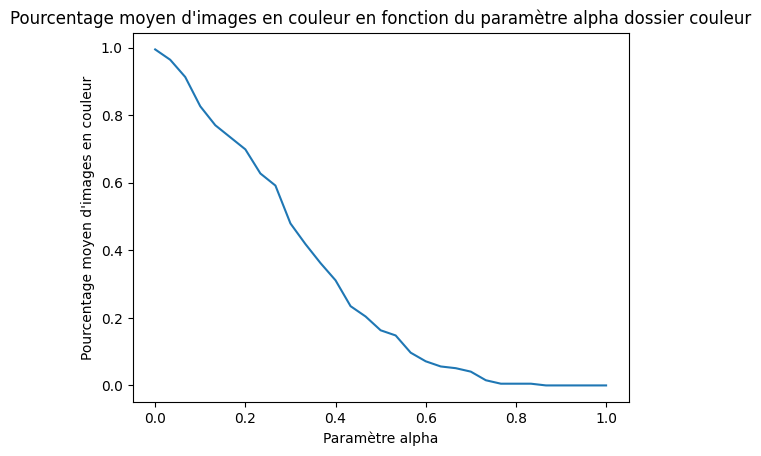

In [95]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

def calculer_histogramme(image):
    # Convertir l'image en espace de couleur HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculer l'histogramme de couleur pour la composante de teinte
    histogramme = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])
    histogramme = cv2.normalize(histogramme, histogramme).flatten()

    return histogramme

# Chemin du dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit_couleur"

# Lister tous les fichiers du dossier
fichiers_images = os.listdir(dossier_images)

# Années à sélectionner (1900 uniquement ou de 1900 à 1905 inclus)
annee_debut = 1900
annee_fin = 2022

# Numéros d'identification à sélectionner (4 à 6 inclus)
numero_debut = 1
numero_fin = 5

# Paramètre alpha (de 0 à 1) pour seuiller l'histogramme de teinte
alphas = np.linspace(0, 1, 31)

# Liste pour stocker les pourcentages moyens d'images en couleur pour chaque valeur de alpha
pourcentages_moyens = []

# Parcourir les valeurs de alpha
for alpha in alphas:
    # Initialiser la liste des pourcentages d'images en couleur pour chaque année
    pourcentages_couleur = []

    # Parcourir les fichiers images
    for fichier_image in fichiers_images:
        # Vérifier si le fichier est une image (extension .jpg, .jpeg)
        if fichier_image.lower().endswith(('.jpg', '.jpeg')):
            # Extraire l'année et le numéro d'identification à partir du nom de fichier
            nom_fichier = os.path.splitext(fichier_image)[0]  # Supprimer l'extension du fichier
            annee, numero = map(int, nom_fichier.split('-'))  # Extraire l'année et le numéro en convertissant en entiers

            # Vérifier si l'année et le numéro sont dans les intervalles souhaités
            if annee_debut <= annee <= annee_fin and numero_debut <= numero <= numero_fin:
                # Charger l'image
                chemin_image = os.path.join(dossier_images, fichier_image)
                image = cv2.imread(chemin_image)

                # Calculer l'histogramme de couleur de l'image
                histogramme = calculer_histogramme(image)

                # Seuiller l'histogramme de teinte
                histogramme_seuil = histogramme[75:]  # Cropped histogram from index 75 to the end
                histogramme_seuil = (histogramme_seuil > alpha).astype(int)  # Seuillage avec la valeur de alpha

                # Vérifier si l'image est en couleur en comptant le nombre de valeurs seuillées non nulles
                est_couleur = np.sum(histogramme_seuil) > 0

                # Ajouter le résultat à la liste des pourcentages d'images en couleur pour l'année donnée
                pourcentages_couleur.append(est_couleur)

    # Calculer le pourcentage moyen d'images en couleur pour toutes les années
    pourcentage_moyen = np.mean(pourcentages_couleur)
    pourcentages_moyens.append(pourcentage_moyen)

# Tracer le graphe du pourcentage moyen d'images en couleur en fonction du paramètre alpha
plt.plot(alphas, pourcentages_moyens)
plt.xlabel('Paramètre alpha')
plt.ylabel('Pourcentage moyen d\'images en couleur')
plt.title('Pourcentage moyen d\'images en couleur en fonction du paramètre alpha dossier couleur')
plt.show()


2 pic : à partir de 2 pic dans la plage considérée, c'est considéré comme étant de la couleur

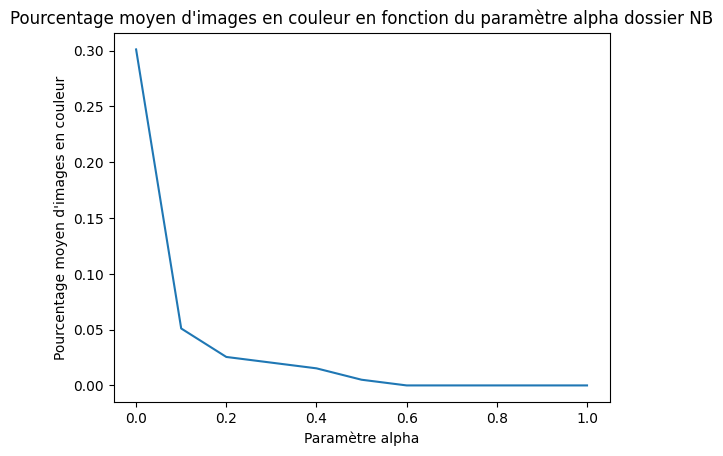

In [36]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

def calculer_histogramme(image):
    # Convertir l'image en espace de couleur HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculer l'histogramme de couleur pour la composante de teinte
    histogramme = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])
    histogramme = cv2.normalize(histogramme, histogramme).flatten()

    return histogramme

# Chemin du dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit_NB"

# Lister tous les fichiers du dossier
fichiers_images = os.listdir(dossier_images)

# Années à sélectionner (1900 uniquement ou de 1900 à 1905 inclus)
annee_debut = 1900
annee_fin = 2022

# Numéros d'identification à sélectionner (4 à 6 inclus)
numero_debut = 1
numero_fin = 5

# Paramètre alpha (de 0 à 1) pour seuiller l'histogramme de teinte
alphas = np.linspace(0, 1, 11)

# Liste pour stocker les pourcentages moyens d'images en couleur pour chaque valeur de alpha
pourcentages_moyens_NB = []

# Parcourir les valeurs de alpha
for alpha in alphas:
    # Initialiser la liste des pourcentages d'images en couleur pour chaque année
    pourcentages_couleur = []

    # Parcourir les fichiers images
    for fichier_image in fichiers_images:
        # Vérifier si le fichier est une image (extension .jpg, .jpeg)
        if fichier_image.lower().endswith(('.jpg', '.jpeg')):
            # Extraire l'année et le numéro d'identification à partir du nom de fichier
            nom_fichier = os.path.splitext(fichier_image)[0]  # Supprimer l'extension du fichier
            annee, numero = map(int, nom_fichier.split('-'))  # Extraire l'année et le numéro en convertissant en entiers

            # Vérifier si l'année et le numéro sont dans les intervalles souhaités
            if annee_debut <= annee <= annee_fin and numero_debut <= numero <= numero_fin:
                # Charger l'image
                chemin_image = os.path.join(dossier_images, fichier_image)
                image = cv2.imread(chemin_image)

                # Calculer l'histogramme de couleur de l'image
                histogramme = calculer_histogramme(image)

                # Seuiller l'histogramme de teinte
                histogramme_seuil = histogramme[75:]  # Cropped histogram from index 75 to the end
                histogramme_seuil = (histogramme_seuil > alpha).astype(int)  # Seuillage avec la valeur de alpha

                # Vérifier si l'image est en couleur en comptant le nombre de valeurs seuillées non nulles
                est_couleur = np.sum(histogramme_seuil) > 1

                # Ajouter le résultat à la liste des pourcentages d'images en couleur pour l'année donnée
                pourcentages_couleur.append(est_couleur)

    # Calculer le pourcentage moyen d'images en couleur pour toutes les années
    pourcentage_moyen = np.mean(pourcentages_couleur)
    pourcentages_moyens_NB.append(pourcentage_moyen)

# Tracer le graphe du pourcentage moyen d'images en couleur en fonction du paramètre alpha
plt.plot(alphas, pourcentages_moyens_NB )
plt.xlabel('Paramètre alpha')
plt.ylabel('Pourcentage moyen d\'images en couleur')
plt.title('Pourcentage moyen d\'images en couleur en fonction du paramètre alpha dossier NB')
plt.show()


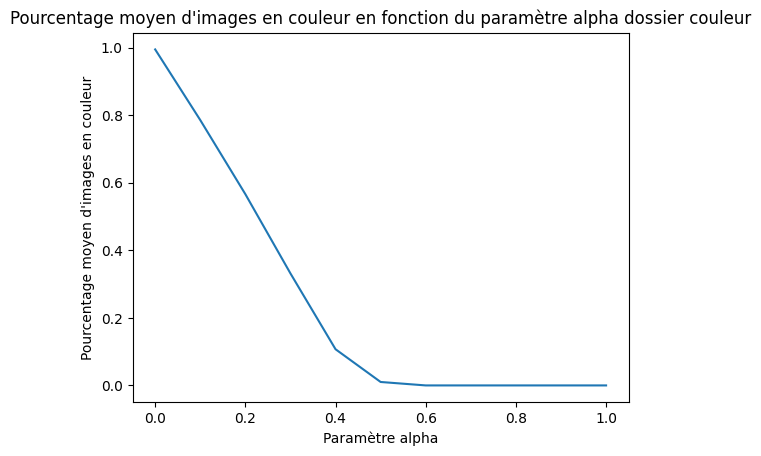

In [37]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

def calculer_histogramme(image):
    # Convertir l'image en espace de couleur HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculer l'histogramme de couleur pour la composante de teinte
    histogramme = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])
    histogramme = cv2.normalize(histogramme, histogramme).flatten()

    return histogramme

# Chemin du dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit_couleur"

# Lister tous les fichiers du dossier
fichiers_images = os.listdir(dossier_images)

# Années à sélectionner (1900 uniquement ou de 1900 à 1905 inclus)
annee_debut = 1900
annee_fin = 2022

# Numéros d'identification à sélectionner (4 à 6 inclus)
numero_debut = 1
numero_fin = 5

# Paramètre alpha (de 0 à 1) pour seuiller l'histogramme de teinte
alphas = np.linspace(0, 1, 11)

# Liste pour stocker les pourcentages moyens d'images en couleur pour chaque valeur de alpha
pourcentages_moyens_couleur = []

# Parcourir les valeurs de alpha
for alpha in alphas:
    # Initialiser la liste des pourcentages d'images en couleur pour chaque année
    pourcentages_couleur = []

    # Parcourir les fichiers images
    for fichier_image in fichiers_images:
        # Vérifier si le fichier est une image (extension .jpg, .jpeg)
        if fichier_image.lower().endswith(('.jpg', '.jpeg')):
            # Extraire l'année et le numéro d'identification à partir du nom de fichier
            nom_fichier = os.path.splitext(fichier_image)[0]  # Supprimer l'extension du fichier
            annee, numero = map(int, nom_fichier.split('-'))  # Extraire l'année et le numéro en convertissant en entiers

            # Vérifier si l'année et le numéro sont dans les intervalles souhaités
            if annee_debut <= annee <= annee_fin and numero_debut <= numero <= numero_fin:
                # Charger l'image
                chemin_image = os.path.join(dossier_images, fichier_image)
                image = cv2.imread(chemin_image)

                # Calculer l'histogramme de couleur de l'image
                histogramme = calculer_histogramme(image)

                # Seuiller l'histogramme de teinte
                histogramme_seuil = histogramme[75:]  # Cropped histogram from index 75 to the end
                histogramme_seuil = (histogramme_seuil > alpha).astype(int)  # Seuillage avec la valeur de alpha

                # Vérifier si l'image est en couleur en comptant le nombre de valeurs seuillées non nulles
                est_couleur = np.sum(histogramme_seuil) > 1

                # Ajouter le résultat à la liste des pourcentages d'images en couleur pour l'année donnée
                pourcentages_couleur.append(est_couleur)

    # Calculer le pourcentage moyen d'images en couleur pour toutes les années
    pourcentage_moyen = np.mean(pourcentages_couleur)
    pourcentages_moyens_couleur.append(pourcentage_moyen)

# Tracer le graphe du pourcentage moyen d'images en couleur en fonction du paramètre alpha
plt.plot(alphas, pourcentages_moyens_couleur)
plt.xlabel('Paramètre alpha')
plt.ylabel('Pourcentage moyen d\'images en couleur')
plt.title('Pourcentage moyen d\'images en couleur en fonction du paramètre alpha dossier couleur')
plt.show()


In [57]:
import os

dossier_images_nb = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit_NB"
dossier_images_couleur = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit_couleur"

dict_images = {}

# Parcourir les fichiers du dossier de photos en N&B
for fichier in os.listdir(dossier_images_nb):
    if fichier.lower().endswith(('.jpg', '.jpeg')):
        chemin_image = os.path.join(dossier_images_nb, fichier)
        annee = fichier.split('-')[0]
        numero = fichier.split('-')[1].split('.')[0]
        nom_image = "{}-{}".format(annee, numero)
        dict_images[nom_image] = 0

# Parcourir les fichiers du dossier de photos en couleur
for fichier in os.listdir(dossier_images_couleur):
    if fichier.lower().endswith(('.jpg', '.jpeg')):
        chemin_image = os.path.join(dossier_images_couleur, fichier)
        annee = fichier.split('-')[0]
        numero = fichier.split('-')[1].split('.')[0]
        nom_image = "{}-{}".format(annee, numero)
        dict_images[nom_image] = 1

# Afficher le dictionnaire des images
for nom_image, couleur in dict_images.items():
    print("{} : {}".format(nom_image, couleur))


1900-001 : 0
1900-002 : 0
1900-003 : 0
1900-004 : 0
1900-005 : 0
1901-003 : 0
1901-004 : 0
1901-005 : 0
1902-001 : 0
1902-002 : 0
1902-005 : 0
1903-001 : 0
1903-002 : 0
1903-003 : 0
1903-004 : 0
1904-002 : 0
1904-003 : 0
1904-004 : 0
1904-005 : 0
1905-001 : 0
1905-004 : 0
1905-005 : 0
1906-001 : 0
1906-002 : 0
1906-003 : 0
1907-001 : 0
1907-002 : 0
1907-003 : 0
1907-004 : 0
1907-005 : 0
1908-003 : 0
1909-001 : 0
1909-002 : 0
1909-005 : 0
1910-001 : 0
1910-002 : 0
1910-003 : 0
1910-004 : 0
1911-002 : 0
1911-003 : 0
1911-004 : 0
1911-005 : 0
1912-001 : 0
1912-004 : 0
1912-005 : 0
1913-001 : 0
1913-002 : 0
1913-003 : 0
1914-001 : 0
1914-002 : 0
1914-003 : 0
1914-004 : 0
1914-005 : 0
1915-003 : 0
1915-004 : 0
1915-005 : 0
1916-001 : 0
1916-002 : 0
1916-005 : 0
1917-001 : 0
1917-002 : 0
1917-003 : 0
1917-004 : 0
1918-002 : 0
1918-003 : 0
1918-004 : 0
1918-005 : 0
1919-001 : 0
1919-004 : 0
1919-005 : 0
1920-001 : 0
1920-002 : 0
1920-003 : 0
1921-001 : 0
1921-002 : 0
1921-003 : 0
1921-004 : 0

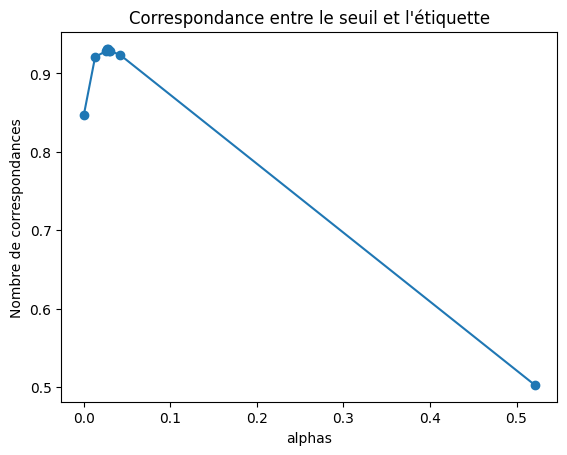

Nombre de correspondances : [0.8469387755102041, 0.9209183673469388, 0.9285714285714286, 0.9311224489795918, 0.9311224489795918, 0.9285714285714286, 0.9285714285714286, 0.923469387755102, 0.5025510204081632]/392


In [143]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour calculer l'histogramme de teinte normalisé d'une image
def calculer_histogramme(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    histogramme = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])
    histogramme = cv2.normalize(histogramme, histogramme).flatten()
    return histogramme

dossier_images_nb = r'C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit_NB'
dossier_images_couleur = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit_couleur"
dict_images = {}
# Parcourir les fichiers du dossier de photos en N&B
for fichier in os.listdir(dossier_images_nb):
    if fichier.lower().endswith(('.jpg', '.jpeg')):
        chemin_image = os.path.join(dossier_images_nb, fichier)
        annee = fichier.split('-')[0]
        numero = fichier.split('-')[1].split('.')[0]
        nom_image = "{}-{}".format(annee, numero)
        dict_images[nom_image] = 0
# Parcourir les fichiers du dossier de photos en couleur
for fichier in os.listdir(dossier_images_couleur):
    if fichier.lower().endswith(('.jpg', '.jpeg')):
        chemin_image = os.path.join(dossier_images_couleur, fichier)
        annee = fichier.split('-')[0]
        numero = fichier.split('-')[1].split('.')[0]
        nom_image = "{}-{}".format(annee, numero)
        dict_images[nom_image] = 1    
    
#seuil = 0.5  # Seuil pour la décision de couleur
compteur_match = []  # Liste pour le nombre de correspondances

# Définir les points de division
points_1 = np.linspace(0, 0.0261 , 2, endpoint=False)
points_2 = np.linspace(0.0261 , 0.0314, 5, endpoint=False)
points_3 = np.linspace(0.042, 1, 2,endpoint=False)

# Concaténer les points pour obtenir la liste finale
alphas = np.concatenate([points_1, points_2, points_3])


for seuil in alphas:
    # Réinitialiser le compteur pour chaque seuil
    compteur = 0

    # Parcourir le dictionnaire d'images
    for nom_image, etiquette in dict_images.items():
        chemin_image = f"C:\\Users\\chris\\OneDrive\\Documents\\Python Scripts\\chronophoto\\photos_NB&couleur\\{nom_image}.JPEG"
        # Charger l'image en couleur
        image = cv2.imread(chemin_image)

        # Calculer l'histogramme de teinte normalisé
        histogramme = calculer_histogramme(image)

        # Seuiller l'histogramme de teinte
        histogramme_seuil = histogramme[75:]  # Cropped histogram from index 75 to the end
        histogramme_seuil = (histogramme_seuil > seuil).astype(int)  # Seuillage avec la valeur de seuil

        # Vérifier si l'image est en couleur en comptant le nombre de valeurs seuillées non nulles
        est_couleur = np.sum(histogramme_seuil) > 1

        # Comparer avec la valeur du dictionnaire
        if est_couleur == etiquette:
            compteur += 1
    
    compteur_match.append(compteur/392)

# Tracer le graphique
plt.plot(alphas, compteur_match, marker='o')
plt.xlabel('alphas')
plt.ylabel('Nombre de correspondances')
plt.title('Correspondance entre le seuil et l\'étiquette')
plt.show()

# Afficher le nombre de correspondances
print(f"Nombre de correspondances : {compteur_match}/{len(dict_images)}")


In [144]:
compteur_match.index(max(compteur_match))

3

In [147]:
max(compteur_match)

0.9311224489795918

In [152]:
print((alphas[3]+alphas[4])/2)

0.02769


In [146]:
compteur_match

[0.8469387755102041,
 0.9209183673469388,
 0.9285714285714286,
 0.9311224489795918,
 0.9311224489795918,
 0.9285714285714286,
 0.9285714285714286,
 0.923469387755102,
 0.5025510204081632]

In [ ]:
points_1 = np.linspace(0, 0.0261 , 2, endpoint=False)
points_2 = np.linspace(0.0261 , 0.0314, 5, endpoint=False)
points_3 = np.linspace(0.042, 1, 2,endpoint=False)

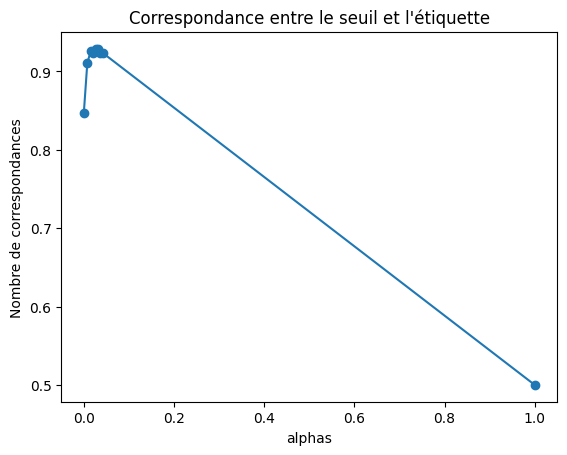

Nombre de correspondances : [0.8469387755102041, 0.9107142857142857, 0.9260204081632653, 0.923469387755102, 0.9285714285714286, 0.9285714285714286, 0.923469387755102, 0.923469387755102, 0.5]/392


In [136]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour calculer l'histogramme de teinte normalisé d'une image
def calculer_histogramme(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    histogramme = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])
    histogramme = cv2.normalize(histogramme, histogramme).flatten()
    return histogramme

dossier_images_nb = r'C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit_NB'
dossier_images_couleur = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit_couleur"
dict_images = {}
# Parcourir les fichiers du dossier de photos en N&B
for fichier in os.listdir(dossier_images_nb):
    if fichier.lower().endswith(('.jpg', '.jpeg')):
        chemin_image = os.path.join(dossier_images_nb, fichier)
        annee = fichier.split('-')[0]
        numero = fichier.split('-')[1].split('.')[0]
        nom_image = "{}-{}".format(annee, numero)
        dict_images[nom_image] = 0
# Parcourir les fichiers du dossier de photos en couleur
for fichier in os.listdir(dossier_images_couleur):
    if fichier.lower().endswith(('.jpg', '.jpeg')):
        chemin_image = os.path.join(dossier_images_couleur, fichier)
        annee = fichier.split('-')[0]
        numero = fichier.split('-')[1].split('.')[0]
        nom_image = "{}-{}".format(annee, numero)
        dict_images[nom_image] = 1    
    
#seuil = 0.5  # Seuil pour la décision de couleur
compteur_match = []  # Liste pour le nombre de correspondances

points_1 = np.linspace(0, 0.0155, 2, endpoint=False)
points_2 = np.linspace(0.0155, 0.042, 5, endpoint=False)
points_3 = np.linspace(0.042, 1, 2)

# Concaténer les points pour obtenir la liste finale
alphas = np.concatenate([points_1, points_2, points_3])


for seuil in alphas:
    # Réinitialiser le compteur pour chaque seuil
    compteur = 0

    # Parcourir le dictionnaire d'images
    for nom_image, etiquette in dict_images.items():
        chemin_image = f"C:\\Users\\chris\\OneDrive\\Documents\\Python Scripts\\chronophoto\\photos_NB&couleur\\{nom_image}.JPEG"
        # Charger l'image en couleur
        image = cv2.imread(chemin_image)

        # Calculer l'histogramme de teinte normalisé
        histogramme = calculer_histogramme(image)

        # Seuiller l'histogramme de teinte
        histogramme_seuil = histogramme[75:]  # Cropped histogram from index 75 to the end
        histogramme_seuil = (histogramme_seuil > seuil).astype(int)  # Seuillage avec la valeur de seuil

        # Vérifier si l'image est en couleur en comptant le nombre de valeurs seuillées non nulles
        est_couleur = np.sum(histogramme_seuil) > 1

        # Comparer avec la valeur du dictionnaire
        if est_couleur == etiquette:
            compteur += 1
    
    compteur_match.append(compteur/392)

# Tracer le graphique
plt.plot(alphas, compteur_match, marker='o')
plt.xlabel('alphas')
plt.ylabel('Nombre de correspondances')
plt.title('Correspondance entre le seuil et l\'étiquette')
plt.show()

# Afficher le nombre de correspondances
print(f"Nombre de correspondances : {compteur_match}/{len(dict_images)}")


In [137]:
points_1 = np.linspace(0, 0.031, 2, endpoint=False)
points_2 = np.linspace(0.031, 0.042, 10, endpoint=False)
points_3 = np.linspace(0.042, 1, 4)

# Concaténer les points pour obtenir la liste finale
alphas = np.concatenate([points_1, points_2, points_3])
print(alphas)

[0.         0.0155     0.031      0.0321     0.0332     0.0343
 0.0354     0.0365     0.0376     0.0387     0.0398     0.0409
 0.042      0.36133333 0.68066667 1.        ]


In [138]:
import os

dossier_images_nb = r'C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit_NB'
dossier_images_couleur = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit_couleur"

dict_images = {}

# Parcourir les fichiers du dossier de photos en N&B
for fichier in os.listdir(dossier_images_nb):
    if fichier.lower().endswith(('.jpg', '.jpeg')):
        chemin_image = os.path.join(dossier_images_nb, fichier)
        annee = fichier.split('-')[0]
        numero = fichier.split('-')[1].split('.')[0]
        nom_image = "{}-{}".format(annee, numero)
        dict_images[nom_image] = 0

# Parcourir les fichiers du dossier de photos en couleur
for fichier in os.listdir(dossier_images_couleur):
    if fichier.lower().endswith(('.jpg', '.jpeg')):
        chemin_image = os.path.join(dossier_images_couleur, fichier)
        annee = fichier.split('-')[0]
        numero = fichier.split('-')[1].split('.')[0]
        nom_image = "{}-{}".format(annee, numero)
        dict_images[nom_image] = 1

# Afficher le dictionnaire des images
for nom_image, couleur in dict_images.items():
    print("{} : {}".format(nom_image, couleur))


1900-001 : 0
1900-002 : 0
1900-003 : 0
1900-004 : 0
1900-005 : 0
1901-003 : 0
1901-004 : 0
1901-005 : 0
1902-001 : 0
1902-002 : 0
1902-005 : 0
1903-001 : 0
1903-002 : 0
1903-003 : 0
1903-004 : 0
1904-002 : 0
1904-003 : 0
1904-004 : 0
1904-005 : 0
1905-001 : 0
1905-004 : 0
1905-005 : 0
1906-001 : 0
1906-002 : 0
1906-003 : 0
1907-001 : 0
1907-002 : 0
1907-003 : 0
1907-004 : 0
1907-005 : 0
1908-003 : 0
1909-001 : 0
1909-002 : 0
1909-005 : 0
1910-001 : 0
1910-002 : 0
1910-003 : 0
1910-004 : 0
1911-002 : 0
1911-003 : 0
1911-004 : 0
1911-005 : 0
1912-001 : 0
1912-004 : 0
1912-005 : 0
1913-001 : 0
1913-002 : 0
1913-003 : 0
1914-001 : 0
1914-002 : 0
1914-003 : 0
1914-004 : 0
1914-005 : 0
1915-003 : 0
1915-004 : 0
1915-005 : 0
1916-001 : 0
1916-002 : 0
1916-005 : 0
1917-001 : 0
1917-002 : 0
1917-003 : 0
1917-004 : 0
1918-002 : 0
1918-003 : 0
1918-004 : 0
1918-005 : 0
1919-001 : 0
1919-004 : 0
1919-005 : 0
1920-001 : 0
1920-002 : 0
1920-003 : 0
1921-001 : 0
1921-002 : 0
1921-003 : 0
1921-004 : 0

In [139]:
dict_images[r'C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit_couleur\2022-003.JPEG']


KeyError: 'C:\\Users\\chris\\OneDrive\\Documents\\Python Scripts\\chronophoto\\photos_echantillon_reduit_couleur\\2022-003.JPEG'

alpha plus précis entre 0 et 0.2     ///    avec alphas = np.concatenate((np.linspace(0, 0.2, 15), np.linspace(0.201, 1, 15)))

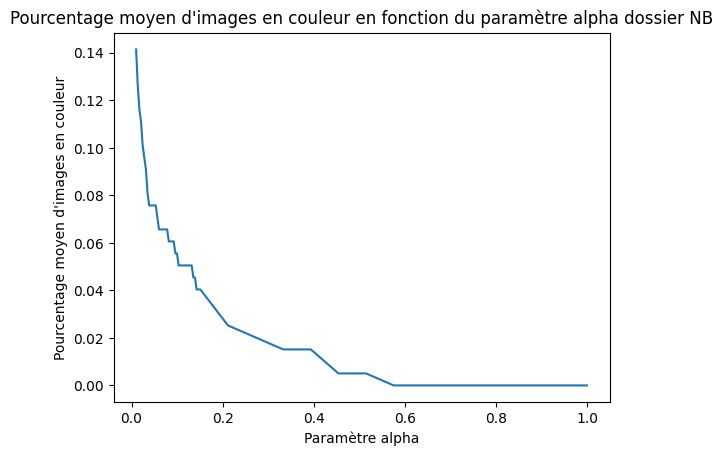

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

def calculer_histogramme(image):
    # Convertir l'image en espace de couleur HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculer l'histogramme de couleur pour la composante de teinte
    histogramme = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])
    histogramme = cv2.normalize(histogramme, histogramme).flatten()

    return histogramme

# Chemin du dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit_NB"

# Lister tous les fichiers du dossier
fichiers_images = os.listdir(dossier_images)

# Années à sélectionner (1900 uniquement ou de 1900 à 1905 inclus)
annee_debut = 1900
annee_fin = 2022

# Numéros d'identification à sélectionner (4 à 6 inclus)
numero_debut = 1
numero_fin = 5

# Paramètre alpha (de 0 à 1) pour seuiller l'histogramme de teinte
alphas = np.concatenate((np.linspace(0.01, 0.15, 40), np.linspace(0.151, 1, 15)))

# Liste pour stocker les pourcentages moyens d'images en couleur pour chaque valeur de alpha
pourcentages_moyens = []

# Parcourir les valeurs de alpha
for alpha in alphas:
    # Initialiser la liste des pourcentages d'images en couleur pour chaque année
    pourcentages_couleur = []

    # Parcourir les fichiers images
    for fichier_image in fichiers_images:
        # Vérifier si le fichier est une image (extension .jpg, .jpeg)
        if fichier_image.lower().endswith(('.jpg', '.jpeg')):
            # Extraire l'année et le numéro d'identification à partir du nom de fichier
            nom_fichier = os.path.splitext(fichier_image)[0]  # Supprimer l'extension du fichier
            annee, numero = map(int, nom_fichier.split('-'))  # Extraire l'année et le numéro en convertissant en entiers

            # Vérifier si l'année et le numéro sont dans les intervalles souhaités
            if annee_debut <= annee <= annee_fin and numero_debut <= numero <= numero_fin:
                # Charger l'image
                chemin_image = os.path.join(dossier_images, fichier_image)
                image = cv2.imread(chemin_image)

                # Calculer l'histogramme de couleur de l'image
                histogramme = calculer_histogramme(image)

                # Seuiller l'histogramme de teinte
                histogramme_seuil = histogramme[75:]  # Cropped histogram from index 75 to the end
                histogramme_seuil = (histogramme_seuil > alpha).astype(int)  # Seuillage avec la valeur de alpha

                # Vérifier si l'image est en couleur en comptant le nombre de valeurs seuillées non nulles
                est_couleur = np.sum(histogramme_seuil) > 1

                # Ajouter le résultat à la liste des pourcentages d'images en couleur pour l'année donnée
                pourcentages_couleur.append(est_couleur)

    # Calculer le pourcentage moyen d'images en couleur pour toutes les années
    pourcentage_moyen = np.mean(pourcentages_couleur)
    pourcentages_moyens.append(pourcentage_moyen)

# Tracer le graphe du pourcentage moyen d'images en couleur en fonction du paramètre alpha
plt.plot(alphas, pourcentages_moyens)
plt.xlabel('Paramètre alpha')
plt.ylabel('Pourcentage moyen d\'images en couleur')
plt.title('Pourcentage moyen d\'images en couleur en fonction du paramètre alpha dossier NB')
plt.show()


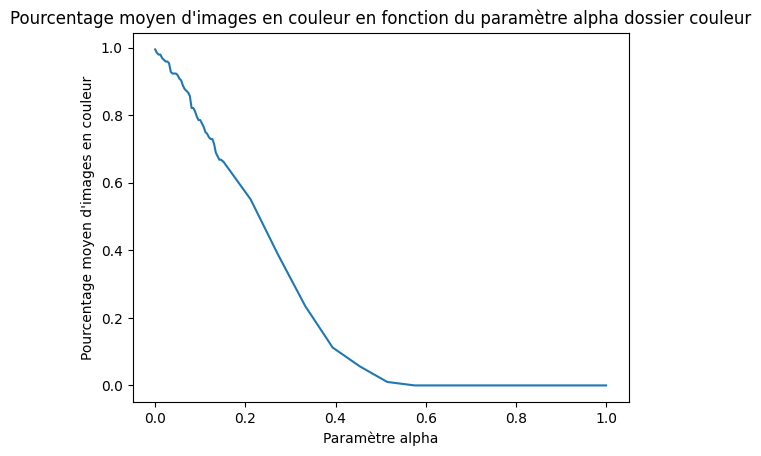

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

def calculer_histogramme(image):
    # Convertir l'image en espace de couleur HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculer l'histogramme de couleur pour la composante de teinte
    histogramme = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])
    histogramme = cv2.normalize(histogramme, histogramme).flatten()

    return histogramme

# Chemin du dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos_echantillon_reduit_couleur"

# Lister tous les fichiers du dossier
fichiers_images = os.listdir(dossier_images)

# Années à sélectionner (1900 uniquement ou de 1900 à 1905 inclus)
annee_debut = 1900
annee_fin = 2022

# Numéros d'identification à sélectionner (4 à 6 inclus)
numero_debut = 1
numero_fin = 5

# Paramètre alpha (de 0 à 1) pour seuiller l'histogramme de teinte
alphas = np.concatenate((np.linspace(0, 0.15, 40), np.linspace(0.151, 1, 15)))

# Liste pour stocker les pourcentages moyens d'images en couleur pour chaque valeur de alpha
pourcentages_moyens_couleur = []

# Parcourir les valeurs de alpha
for alpha in alphas:
    # Initialiser la liste des pourcentages d'images en couleur pour chaque année
    pourcentages_couleur = []

    # Parcourir les fichiers images
    for fichier_image in fichiers_images:
        # Vérifier si le fichier est une image (extension .jpg, .jpeg)
        if fichier_image.lower().endswith(('.jpg', '.jpeg')):
            # Extraire l'année et le numéro d'identification à partir du nom de fichier
            nom_fichier = os.path.splitext(fichier_image)[0]  # Supprimer l'extension du fichier
            annee, numero = map(int, nom_fichier.split('-'))  # Extraire l'année et le numéro en convertissant en entiers

            # Vérifier si l'année et le numéro sont dans les intervalles souhaités
            if annee_debut <= annee <= annee_fin and numero_debut <= numero <= numero_fin:
                # Charger l'image
                chemin_image = os.path.join(dossier_images, fichier_image)
                image = cv2.imread(chemin_image)

                # Calculer l'histogramme de couleur de l'image
                histogramme = calculer_histogramme(image)

                # Seuiller l'histogramme de teinte
                histogramme_seuil = histogramme[75:]  # Cropped histogram from index 75 to the end
                histogramme_seuil = (histogramme_seuil > alpha).astype(int)  # Seuillage avec la valeur de alpha

                # Vérifier si l'image est en couleur en comptant le nombre de valeurs seuillées non nulles
                est_couleur = np.sum(histogramme_seuil) > 1

                # Ajouter le résultat à la liste des pourcentages d'images en couleur pour l'année donnée
                pourcentages_couleur.append(est_couleur)

    # Calculer le pourcentage moyen d'images en couleur pour toutes les années
    pourcentage_moyen = np.mean(pourcentages_couleur)
    pourcentages_moyens_couleur.append(pourcentage_moyen)

# Tracer le graphe du pourcentage moyen d'images en couleur en fonction du paramètre alpha
plt.plot(alphas, pourcentages_moyens_couleur)
plt.xlabel('Paramètre alpha')
plt.ylabel('Pourcentage moyen d\'images en couleur')
plt.title('Pourcentage moyen d\'images en couleur en fonction du paramètre alpha dossier couleur')
plt.show()


In [ ]:
if len(pourcentages_moyens_couleur)!=len(pourcentages_moyens):
    print('pas la meme')
else:
    L=[]
    for i in range (int(len(pourcentages_moyens_couleur)/2)):
        L.append(pourcentages_moyens_couleur[i]/pourcentages_moyens[i])
    print(max(L))
    a=L.index(max(L))
    print(alphas[a])





15.557142857142857
0.10333333333333332


In [ ]:
i=0
while pourcentages_moyens[i]>0.05:
    i=i+1
print(i-1)

25


In [ ]:
print(pourcentages_moyens[i], pourcentages_moyens[i-1])

0.045454545454545456 0.050505050505050504


In [ ]:
alphas[25]

0.1306896551724138

In [ ]:
len(pourcentages_moyens)

10

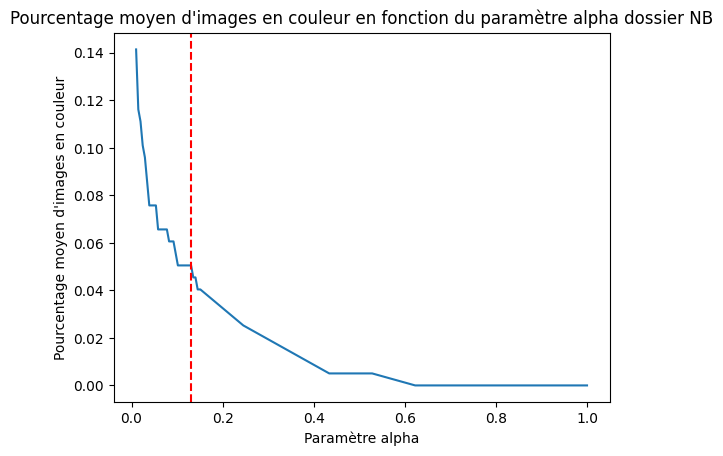

In [ ]:
# Tracer le graphe du pourcentage moyen d'images en couleur en fonction du paramètre alpha
plt.plot(alphas, pourcentages_moyens)
plt.axvline(x=float(0.1306896551724138), color='r', linestyle='--')
plt.xlabel('Paramètre alpha')
plt.ylabel('Pourcentage moyen d\'images en couleur')
plt.title('Pourcentage moyen d\'images en couleur en fonction du paramètre alpha dossier NB')
plt.show()


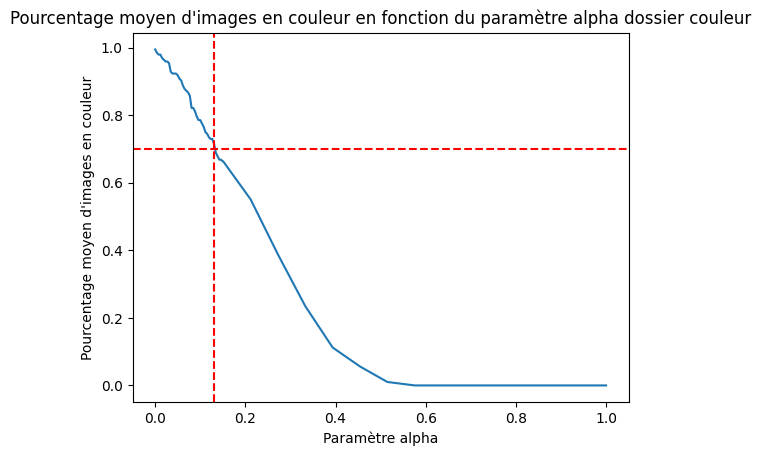

In [ ]:
# Tracer le graphe du pourcentage moyen d'images en couleur en fonction du paramètre alpha
plt.plot(alphas, pourcentages_moyens_couleur)
plt.axvline(x=float(0.1306896551724138), color='r', linestyle='--')
plt.axhline(y=0.7, color='r', linestyle='--')
plt.xlabel('Paramètre alpha')
plt.ylabel('Pourcentage moyen d\'images en couleur')
plt.title('Pourcentage moyen d\'images en couleur en fonction du paramètre alpha dossier couleur')
plt.show()


Le programme a mis 220.29877638816833 secondes à s'exécuter.


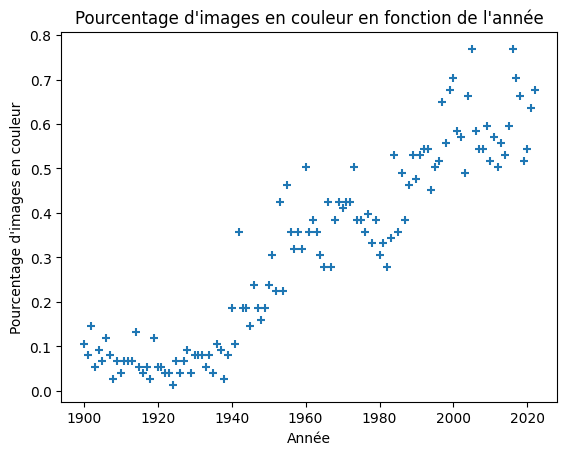

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import time
temps_debut = time.time()
def calculer_histogramme(image):
    # Convertir l'image en espace de couleur HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculer l'histogramme de couleur pour la composante de teinte
    histogramme = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])
    histogramme = cv2.normalize(histogramme, histogramme).flatten()

    return histogramme

# Chemin du dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos"

# Lister tous les fichiers du dossier
fichiers_images = os.listdir(dossier_images)

# Années à sélectionner (1900 uniquement ou de 1900 à 1905 inclus)
annee_debut = 1900
annee_fin = 2022

# Liste pour stocker les années et les pourcentages d'images en couleur
annees = []
pourcentages_couleur = []

# Parcourir les années
for annee in range(annee_debut, annee_fin+1):
    # Initialiser le compteur d'images en couleur
    nombre_images_couleur = 0

    # Parcourir les fichiers images
    for fichier_image in fichiers_images:
        # Vérifier si le fichier est une image (extension .jpg, .jpeg)
        if fichier_image.lower().endswith(('.jpg', '.jpeg')):
            # Extraire l'année et le numéro d'identification à partir du nom de fichier
            nom_fichier = os.path.splitext(fichier_image)[0]  # Supprimer l'extension du fichier
            annee_image, _ = map(int, nom_fichier.split('-'))  # Extraire l'année en convertissant en entier

            # Vérifier si l'année correspond à celle en cours de traitement
            if annee_image == annee:
                # Charger l'image
                chemin_image = os.path.join(dossier_images, fichier_image)
                image = cv2.imread(chemin_image)

                # Calculer l'histogramme de couleur de l'image
                histogramme = calculer_histogramme(image)

                # Seuiller l'histogramme de teinte avec l'alpha spécifié
                alpha = 0.1033333333333
                histogramme_seuil = histogramme[75:]  # Cropped histogram from index 75 to the end
                histogramme_seuil = (histogramme_seuil > alpha).astype(int)  # Seuillage avec la valeur de alpha

                # Vérifier si l'image est en couleur en comptant le nombre de valeurs seuillées non nulles
                est_couleur = np.sum(histogramme_seuil) > 1

                # Incrémenter le compteur d'images en couleur si l'image est en couleur
                if est_couleur:
                    nombre_images_couleur += 1

    # Calculer le pourcentage d'images en couleur pour l'année en cours
    pourcentage_couleur = (nombre_images_couleur / len(fichiers_images)) * 100

    # Ajouter l'année et le pourcentage à leurs listes respectives
    annees.append(annee)
    pourcentages_couleur.append(pourcentage_couleur)
    
temps_fin = time.time()
temps_execution = temps_fin - temps_debut
print("Le programme a mis", temps_execution, "secondes à s'exécuter.")

# Tracer le graphe du pourcentage d'images en couleur en fonction de l'année
plt.scatter(annees, pourcentages_couleur, marker='+')
plt.xlabel('Année')
plt.ylabel('Pourcentage d\'images en couleur')
plt.title('Pourcentage d\'images en couleur en fonction de l\'année')
plt.show()


Le programme a mis 224.9823296070099 secondes à s'exécuter.


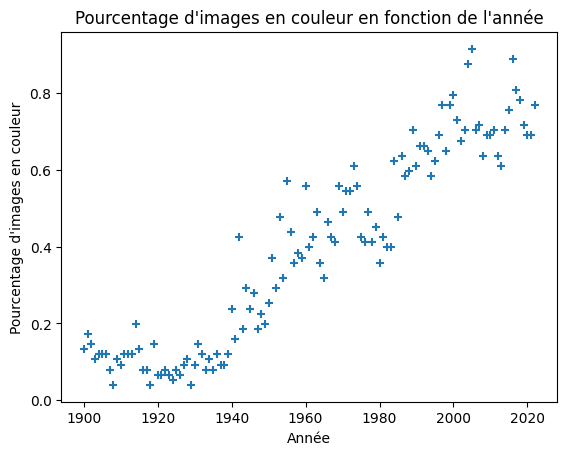

In [153]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import time
temps_debut = time.time()
def calculer_histogramme(image):
    # Convertir l'image en espace de couleur HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculer l'histogramme de couleur pour la composante de teinte
    histogramme = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])
    histogramme = cv2.normalize(histogramme, histogramme).flatten()

    return histogramme

# Chemin du dossier contenant les images
dossier_images = r"C:\Users\chris\OneDrive\Documents\Python Scripts\chronophoto\photos"

# Lister tous les fichiers du dossier
fichiers_images = os.listdir(dossier_images)

# Années à sélectionner (1900 uniquement ou de 1900 à 1905 inclus)
annee_debut = 1900
annee_fin = 2022

# Liste pour stocker les années et les pourcentages d'images en couleur
annees = []
pourcentages_couleur = []

# Parcourir les années
for annee in range(annee_debut, annee_fin+1):
    # Initialiser le compteur d'images en couleur
    nombre_images_couleur = 0

    # Parcourir les fichiers images
    for fichier_image in fichiers_images:
        # Vérifier si le fichier est une image (extension .jpg, .jpeg)
        if fichier_image.lower().endswith(('.jpg', '.jpeg')):
            # Extraire l'année et le numéro d'identification à partir du nom de fichier
            nom_fichier = os.path.splitext(fichier_image)[0]  # Supprimer l'extension du fichier
            annee_image, _ = map(int, nom_fichier.split('-'))  # Extraire l'année en convertissant en entier

            # Vérifier si l'année correspond à celle en cours de traitement
            if annee_image == annee:
                # Charger l'image
                chemin_image = os.path.join(dossier_images, fichier_image)
                image = cv2.imread(chemin_image)

                # Calculer l'histogramme de couleur de l'image
                histogramme = calculer_histogramme(image)

                # Seuiller l'histogramme de teinte avec l'alpha spécifié
                alpha = 0.02769
                histogramme_seuil = histogramme[75:]  # Cropped histogram from index 75 to the end
                histogramme_seuil = (histogramme_seuil > alpha).astype(int)  # Seuillage avec la valeur de alpha

                # Vérifier si l'image est en couleur en comptant le nombre de valeurs seuillées non nulles
                est_couleur = np.sum(histogramme_seuil) > 1

                # Incrémenter le compteur d'images en couleur si l'image est en couleur
                if est_couleur:
                    nombre_images_couleur += 1

    # Calculer le pourcentage d'images en couleur pour l'année en cours
    pourcentage_couleur = (nombre_images_couleur / len(fichiers_images)) * 100

    # Ajouter l'année et le pourcentage à leurs listes respectives
    annees.append(annee)
    pourcentages_couleur.append(pourcentage_couleur)
    
temps_fin = time.time()
temps_execution = temps_fin - temps_debut
print("Le programme a mis", temps_execution, "secondes à s'exécuter.")

# Tracer le graphe du pourcentage d'images en couleur en fonction de l'année
plt.scatter(annees, pourcentages_couleur, marker='+')
plt.xlabel('Année')
plt.ylabel('Pourcentage d\'images en couleur')
plt.title('Pourcentage d\'images en couleur en fonction de l\'année')
plt.show()


!!!!!!!!!en vérité, avant 1950 toutes les photos sont en Noir et Blanc et après 1990 toutes les photos sont en couleurs (sauf certaines qui ont été converties volontairement en N/B)!!!!!!!!!!

In [ ]:
a={'NB': 0}
b={'couleur': 1,}
a.update(b)

In [ ]:
print(a)

{'NB': 0, 'couleur': 1}
